In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()

x_treino, x_teste = x_treino / 255.0, x_teste / 255.0 # Normaliza os valores dos pixels para ficar entre 0 e 1

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_treino.shape

(60000, 28, 28)

In [ ]:
# Adiciona uma nova dimensão no final do array (canal de cor)
x_treino = np.expand_dims(x_treino, -1)
x_teste = np.expand_dims(x_teste, -1)

In [ ]:
x_treino.shape

(60000, 28, 28, 1)

In [ ]:
K = len(set(y_treino))
K

10

In [ ]:
i = Input(shape=x_treino[0].shape) #camada de entrada
x = Conv2D(32, (3,3), strides = 2, activation = 'relu') (i) #camada de convolução
x = Conv2D(64, (3,3), strides = 2, activation = 'relu') (x) #camada de convolução
x = Conv2D(128, (3,3), strides = 2, activation = 'relu') (x) #camada de convolução
x = Flatten()(x) #Deixar em uma dimensão
x = Dropout(0.2)(x) #evitar overfitting
x = Dense(512, activation = 'relu')(x) #Camada densa
x = Dropout(0.2)(x) #evitar overfitting
x = Dense(K, activation = 'softmax')(x) #camada de saída

model = Model(i,x)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_treino, y_treino, validation_data=(x_teste, y_teste), epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7455 - loss: 0.6884 - val_accuracy: 0.8470 - val_loss: 0.4044
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8608 - loss: 0.3702 - val_accuracy: 0.8731 - val_loss: 0.3465
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.8836 - loss: 0.3143 - val_accuracy: 0.8870 - val_loss: 0.3136
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8956 - loss: 0.2759 - val_accuracy: 0.8883 - val_loss: 0.3106
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9074 - loss: 0.2450 - val_accuracy: 0.8944 - val_loss: 0.2961


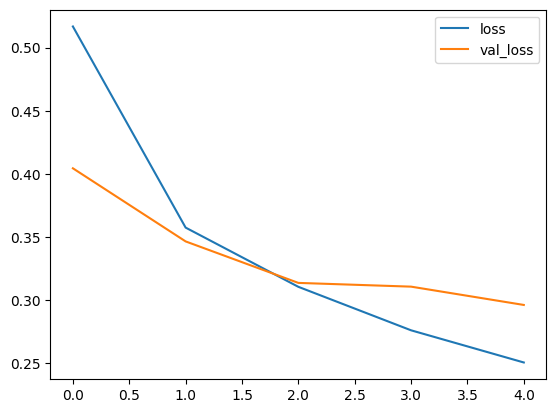

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

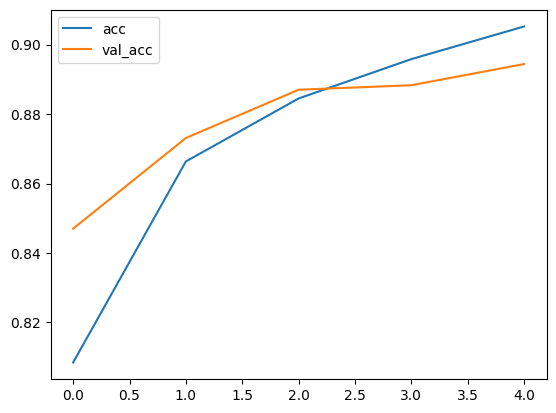

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
confusion matrix, without normalization
[[838   0  22  31   2   0 101   0   6   0]
 [  1 975   1  18   2   0   1   0   2   0]
 [ 14   0 867   8  39   0  69   0   3   0]
 [ 12   4  18 913  24   0  26   0   3   0]
 [  0   1  74  40 794   0  90   0   1   0]
 [  0   0   0   2   0 962   1  22   1  12]
 [115   0  73  34  73   0 693   1  11   0]
 [  0   0   0   0   0   7   0 963   2  28]
 [  1   1   8   3   3   2   6   2 973   1]
 [  0   0   0   0   0   3   1  30   0 966]]


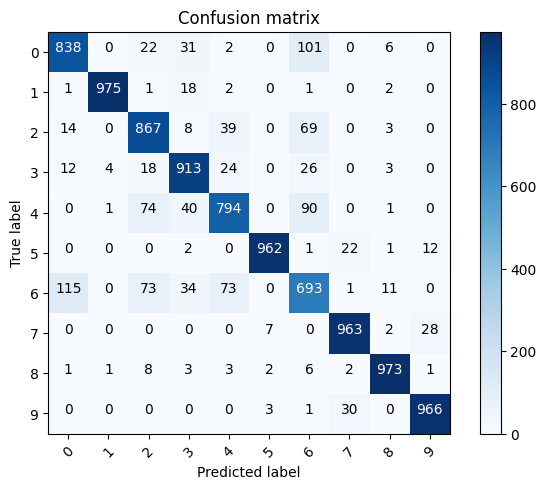

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,              # Se True, normaliza a matriz
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    # Se for para normalizar, divide cada valor pelo total da sua linha
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Cria o gráfico da matriz com cores
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))  # Posições dos rótulos
    plt.xticks(tick_marks, classes, rotation=45)  # Rótulos no eixo X
    plt.yticks(tick_marks, classes)               # Rótulos no eixo Y

    # Define o formato dos números exibidos (decimal se normalizado)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Insere os valores no meio de cada célula da matriz
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')       # Eixo Y
    plt.xlabel('Predicted label')  # Eixo X
    plt.show()

# Faz as previsões com o modelo, pegando a classe com maior probabilidade
p_test = model.predict(x_teste).argmax(axis=1)

# Compara os rótulos reais com os previstos para gerar a matriz
cm = confusion_matrix(y_teste, p_test)

# Plota a matriz de confusão com rótulos de 0 a 9 (10 classes do Fashion MNIST)
plot_confusion_matrix(cm, list(range(10)))

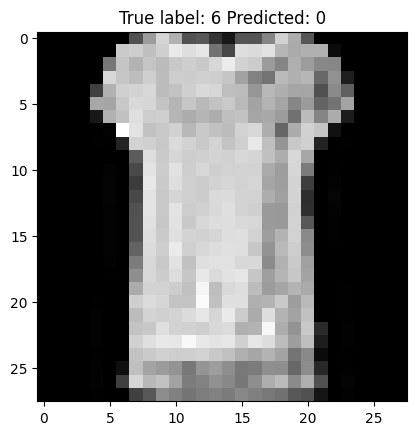

In [ ]:
misclassified_idx = np.where(p_test != y_teste)[0] # Encontra os índices das imagens que o modelo errou


# Escolhe aleatoriamente um desses índices de erro
i = np.random.choice(misclassified_idx)

plt.imshow(x_teste[i].reshape(28, 28), cmap='gray') # Exibe a imagem correspondente ao erro escolhido
plt.title("True label: %s Predicted: %s" % (y_teste[i], p_test[i]));